# Number 2

In [2]:
import pandas as pd

In [3]:
#a
df=pd.read_csv(r'c:\Users\Namara Racheal\Desktop\exam_cohort3\data.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [4]:
#b
missing_proportion = df.isnull().mean() * 100

In [5]:

#c
num_rows, num_columns = df.shape
print("Size of the matrix: {} rows x {} columns".format(num_rows, num_columns))


Size of the matrix: 7043 rows x 21 columns


In [6]:

#d
num_variables = df.shape[1]
print("Number of variables in the matrix:", num_variables)


Number of variables in the matrix: 21


In [7]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [8]:
import missingno as msno

<Axes: >

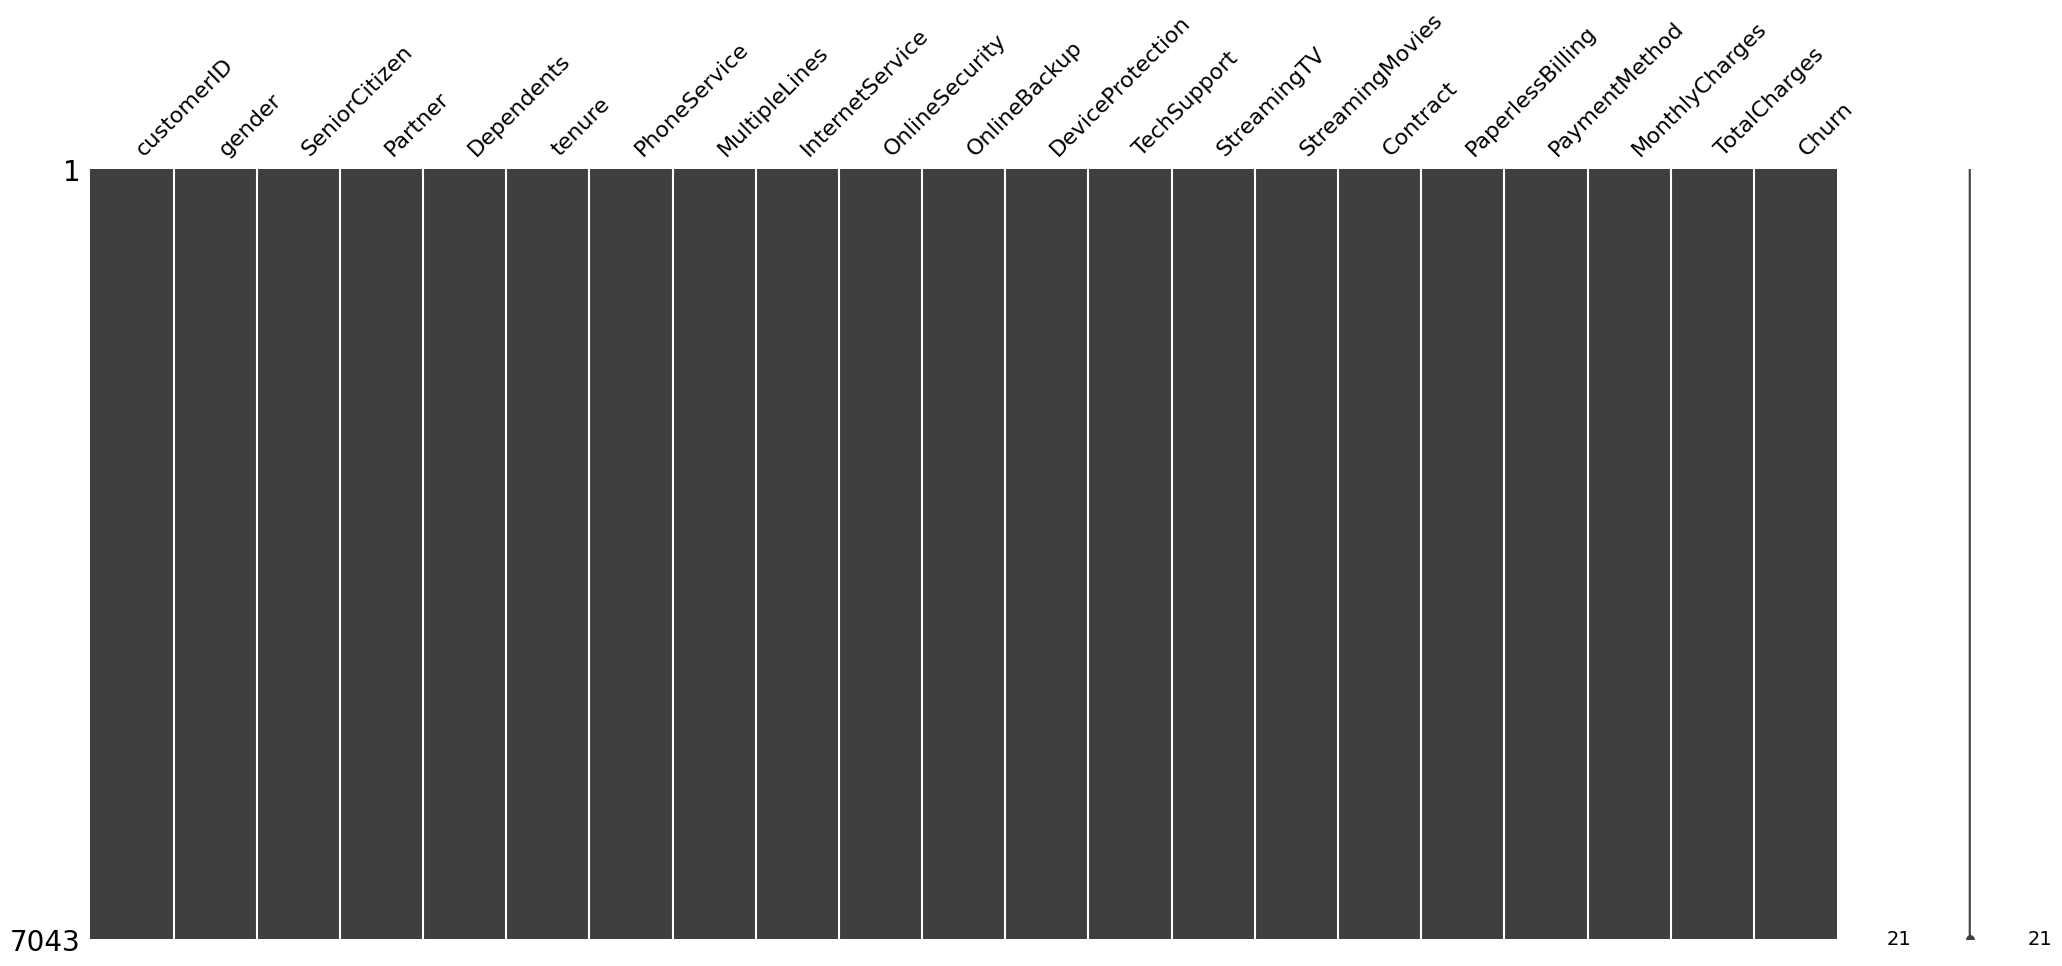

In [9]:
#e

columns_to_keep = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                   'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                   'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
#new data frame
df_cleaned = df[columns_to_keep]

msno.matrix(df_cleaned)


In [10]:
#f
# First, convert 'TotalCharges' column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Number of missing values in 'TotalCharges' column before filling:", df['TotalCharges'].isnull().sum())
mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_total_charges, inplace=True)
print("Number of missing values in 'TotalCharges' column after filling:", df['TotalCharges'].isnull().sum())


Number of missing values in 'TotalCharges' column before filling: 11
Number of missing values in 'TotalCharges' column after filling: 0


C:\Users\Namara Racheal\AppData\Local\Temp\ipykernel_8440\3996822361.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(mean_total_charges, inplace=True)


In [12]:
#g
senior_citizen_map = {0: "No", 1: "Yes"}
df['SeniorCitizen'] = df['SeniorCitizen'].map(senior_citizen_map)
print(df)


      customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female           NaN     Yes         No       1   
1     5575-GNVDE    Male           NaN      No         No      34   
2     3668-QPYBK    Male           NaN      No         No       2   
3     7795-CFOCW    Male           NaN      No         No      45   
4     9237-HQITU  Female           NaN      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7038  6840-RESVB    Male           NaN     Yes        Yes      24   
7039  2234-XADUH  Female           NaN     Yes        Yes      72   
7040  4801-JZAZL  Female           NaN     Yes        Yes      11   
7041  8361-LTMKD    Male           NaN     Yes         No       4   
7042  3186-AJIEK    Male           NaN      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes    

# Number 3

In [14]:
import matplotlib.pyplot as plt

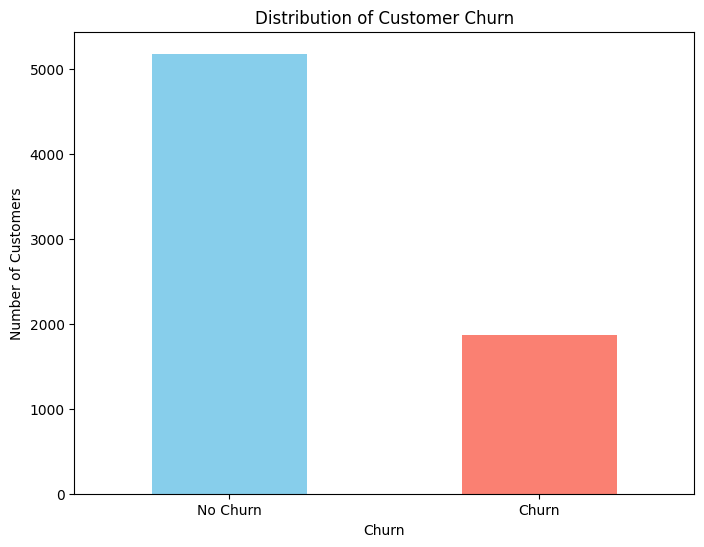

In [18]:
#a
#we can use the 'Churn' variable. We can visualize the distribution using a bar plot
#or calculate the percentage of customers who churned versus those who did not. 
#This analysis helps understand the proportion of customers who have churned, 
#which is crucial for assessing customer retention.
churn_counts = df['Churn'].value_counts()

# Plot the distribution of customer churn
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0, ticks=[0, 1], labels=['No Churn', 'Churn'])  # Setting ticks explicitly
plt.show()

<Figure size 800x600 with 0 Axes>

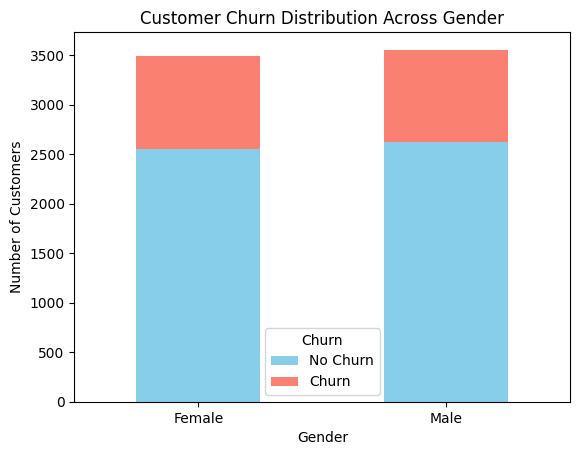

In [19]:
#b
gender_churn_counts = df.groupby(['gender', 'Churn']).size().unstack()
plt.figure(figsize=(8, 6))
gender_churn_counts.plot(kind='bar', color=['skyblue', 'salmon'], stacked=True)
plt.title('Customer Churn Distribution Across Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

<Figure size 800x600 with 0 Axes>

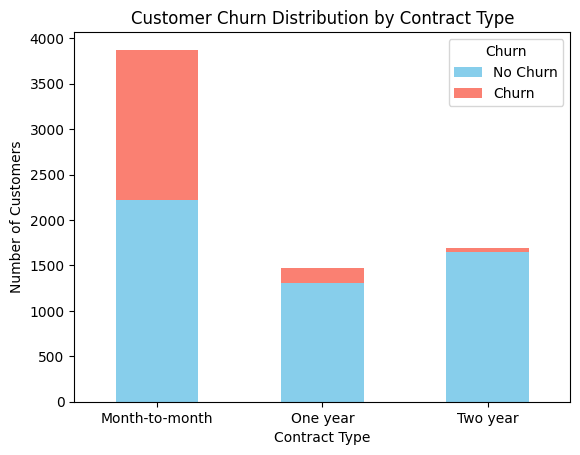

In [20]:
#c
contract_churn_counts = df.groupby(['Contract', 'Churn']).size().unstack()
plt.figure(figsize=(8, 6))
contract_churn_counts.plot(kind='bar', color=['skyblue', 'salmon'], stacked=True)
plt.title('Customer Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

<Figure size 1000x600 with 0 Axes>

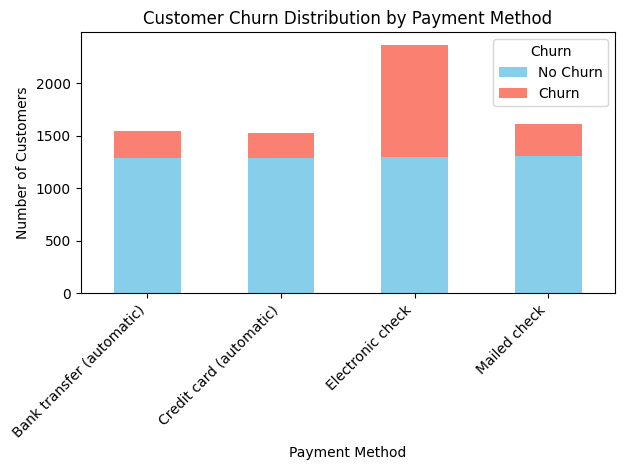

In [21]:
#d
payment_churn_counts = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
plt.figure(figsize=(10, 6))
payment_churn_counts.plot(kind='bar', color=['skyblue', 'salmon'], stacked=True)
plt.title('Customer Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

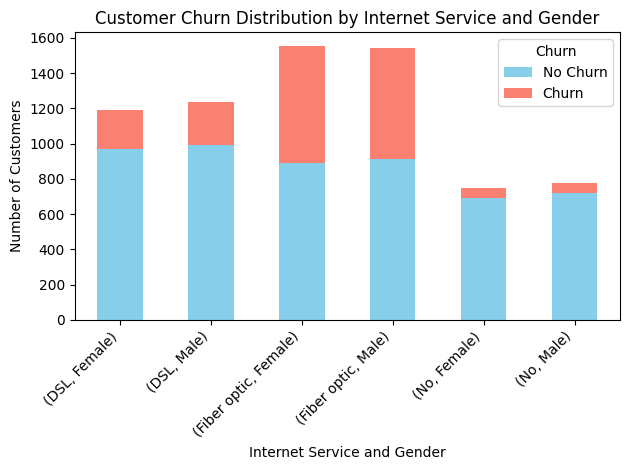

In [22]:
#e
internet_gender_churn_counts = df.groupby(['InternetService', 'gender', 'Churn']).size().unstack()
plt.figure(figsize=(10, 6))
internet_gender_churn_counts.plot(kind='bar', color=['skyblue', 'salmon'], stacked=True)
plt.title('Customer Churn Distribution by Internet Service and Gender')
plt.xlabel('Internet Service and Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

In [23]:
import seaborn as sns
 

C:\Users\Namara Racheal\AppData\Local\Temp\ipykernel_8440\1468377469.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=df, ax=ax, palette='muted')
C:\Users\Namara Racheal\AppData\Local\Temp\ipykernel_8440\1468377469.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=df, ax=ax, palette='muted')
C:\Users\Namara Racheal\AppData\Local\Temp\ipykernel_8440\1468377469.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=df, ax=ax, palette='muted')
C:\Users\Namara Racheal\AppData

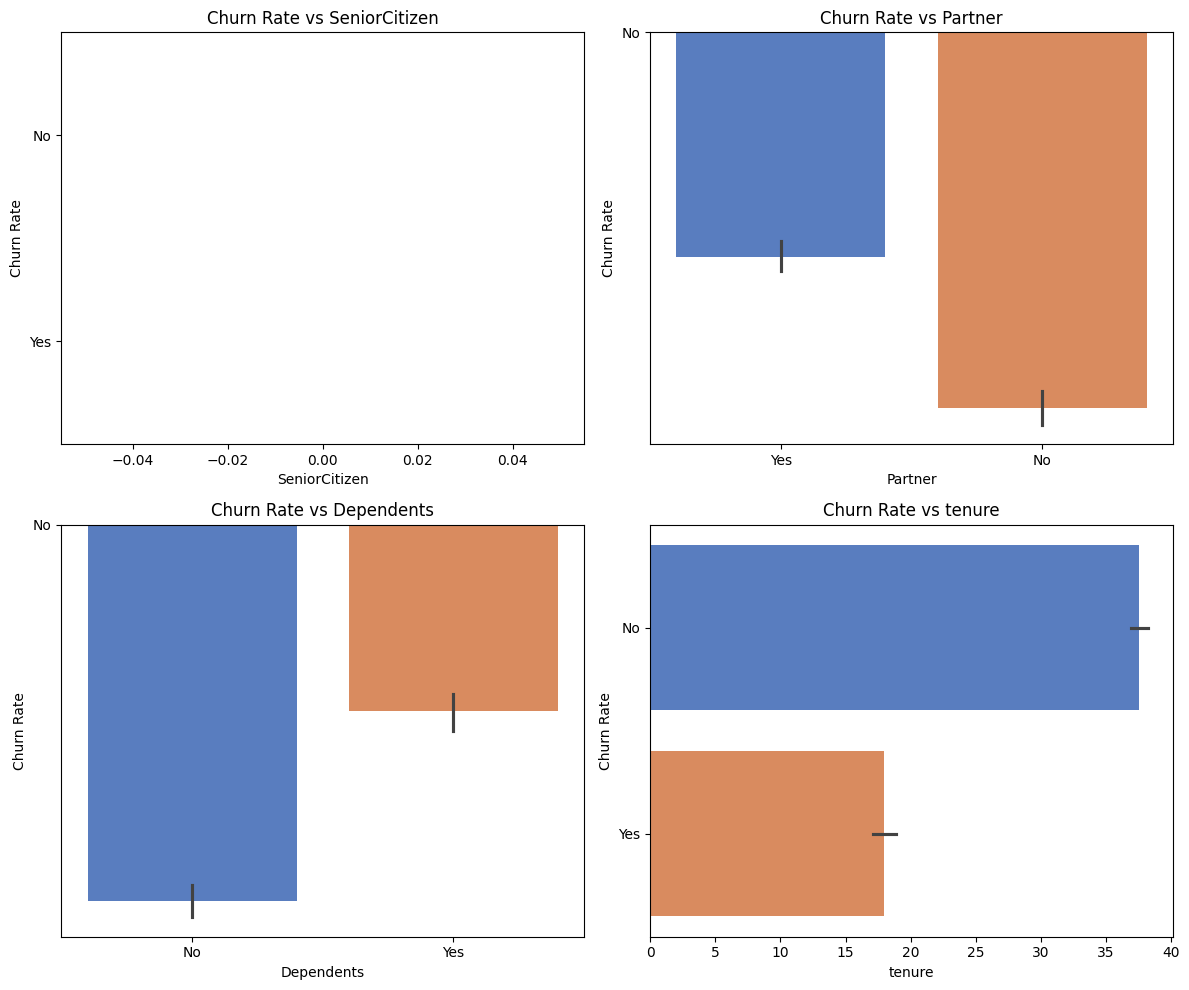

In [24]:
#f
variables_of_interest = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, var in enumerate(variables_of_interest):
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    sns.barplot(x=var, y='Churn', data=df, ax=ax, palette='muted')
    ax.set_title(f'Churn Rate vs {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Churn Rate')
plt.tight_layout()
plt.show()


# Number four


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_val_score



In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
y = df['Churn'].map({'No': 0, 'Yes': 1})

X_scaled = scaler.fit_transform(X[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Assign the scaled features back to the original DataFrame
X[['tenure', 'MonthlyCharges', 'TotalCharges']] = X_scaled
X[['tenure', 'MonthlyCharges', 'TotalCharges']] = X_scaled
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
scaler = StandardScaler()
X[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X[['tenure', 'MonthlyCharges', 'TotalCharges']])
y = df['Churn'].map({'No': 0, 'Yes': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())
logistic_model.fit(X_train, y_train)

# Train KNN model
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_model.fit(X_train, y_train)

# Evaluate models using cross-validation
def evaluate_model(model, X, y):
    roc_auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return np.mean(roc_auc_scores), np.std(roc_auc_scores), np.mean(accuracy_scores), np.std(accuracy_scores)

logistic_roc_auc_mean, logistic_roc_auc_std, logistic_accuracy_mean, logistic_accuracy_std = evaluate_model(logistic_model, X, y)
knn_roc_auc_mean, knn_roc_auc_std, knn_accuracy_mean, knn_accuracy_std = evaluate_model(knn_model, X, y)

# Display evaluation results
evaluation_results = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'KNN'],
    'ROC AUC Mean': [logistic_roc_auc_mean, knn_roc_auc_mean],
    'ROC AUC STD': [logistic_roc_auc_std, knn_roc_auc_std],
    'Accuracy Mean': [logistic_accuracy_mean, knn_accuracy_mean],
    'Accuracy STD': [logistic_accuracy_std, knn_accuracy_std]
})
print(evaluation_results)

             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0  Logistic Regression      0.807555     0.007811       0.785179      0.007081
1                  KNN      0.766255     0.013130       0.776091      0.013893
